# Survey Participants

This notebooks visualizes some participant information from the survey.

* _Input:_ Clean .csv from Qualtrics with location, activity and occupancy questions
* _Output:_ Saves a .csv to disk, exports graphs as .jpg

**Tasks:** 
* Counts all participants 
* Counts all participants per location
* Prints statistics about the average time to complete the survey
* Plots a distribution of time to complete the survey

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [1]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [2]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [3]:
# External libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Load the clean csv

In [13]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'survey-data/survey_data_raw_v2.csv'

full_data = import_csv(file)

## Analysis of participants

### Participants in total

Counts the rows in the dataframe and plots a single bar chart with total amount.

Total number of participants: 29


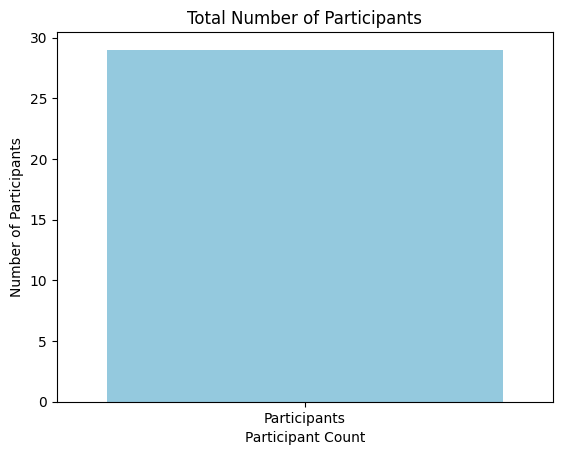

In [14]:
data = import_csv(file)

def count_participants(df):
    num_rows = len(df)
    return num_rows

total_participants = count_participants(data)
print("Total number of participants:", total_participants)

sns.barplot(x=['Participants'], y=[total_participants], color='skyblue')

plt.xlabel('Participant Count')
plt.ylabel('Number of Participants')
plt.title('Total Number of Participants')

plt.show()

### Participants per location

Counts the rows in the dataframe mapped to the location floor and plots in a bar chart with labels for each floor.

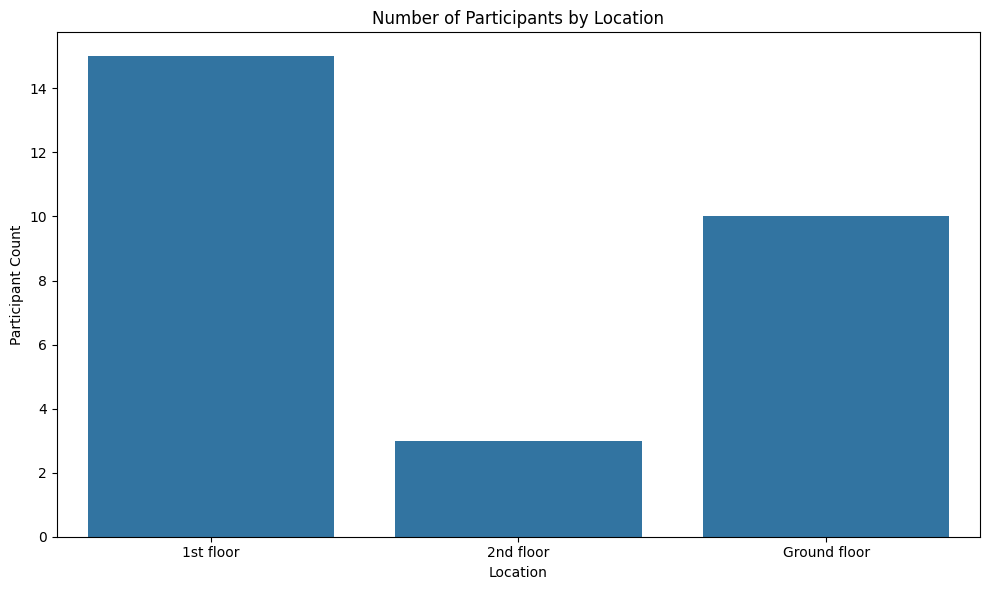

In [15]:
data = import_csv(file)

floor_mapping = {
    'On the ground floor (the atrium)': 'Ground floor',
    'On the first floor (1st floor - in a working space)': '1st floor',
    'On the second floor (2th floor - in a working space)': '2nd floor'
}

data['Location'] = data['Location'].map(floor_mapping)

location_counts = data.groupby('Location').size().reset_index(name='Participant Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Participant Count', data=location_counts)

plt.xlabel('Location')
plt.ylabel('Participant Count')
plt.title('Number of Participants by Location')

plt.tight_layout()
plt.show()

### Time to complete

**Plots some statistics (average, min, max) times to complete the survey in seconds**

In [16]:
data = import_csv(file)

def survey_completion_stats(data):
    duration_data = data[data['Duration (in seconds)'].notnull()]['Duration (in seconds)']
    
    min_time = duration_data.min()
    max_time = duration_data.max()
    mean_time = duration_data.mean()
    median_time = duration_data.median()
    
    print("Minimum time to complete survey:", min_time, "seconds")
    print("Maximum time to complete survey:", max_time, "seconds")
    print("Mean time to complete survey:", mean_time, "seconds")
    print("Median time to complete survey:", median_time, "seconds")
survey_completion_stats(data)

Minimum time to complete survey: 37 seconds
Maximum time to complete survey: 183316 seconds
Mean time to complete survey: 6479.724137931034 seconds
Median time to complete survey: 133.0 seconds


**Plots a distribution in history of the average time to complete the survey in seconds**

0         37
1        156
2        184
3         60
4         69
5         88
6         93
7         87
8        103
9        117
10    183316
11       133
12       195
13       104
14        95
15       411
16       134
17       147
18       110
19       246
20       157
21       261
22       521
23       130
24       101
25       149
26        72
27       405
28       231
Name: Duration (in seconds), dtype: int64


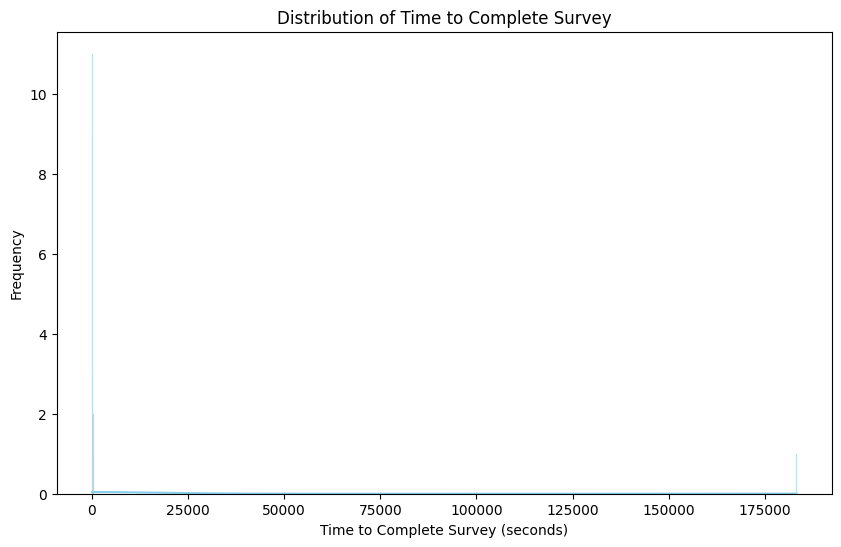

In [17]:
data = import_csv(file)

def print_duration_column(data):
    if 'Duration (in seconds)' in data.columns:
        print(data['Duration (in seconds)'])

print_duration_column(data)

duration_data = data[data['Duration (in seconds)'].notnull()]['Duration (in seconds)']

plt.figure(figsize=(10, 6))
sns.histplot(duration_data, kde=True, color='skyblue')

plt.xlabel('Time to Complete Survey (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Complete Survey')
plt.show()